In [1]:
import base64
import io
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [5]:
# Reading image as a binary
# This functionality can be use if we are getting image from UI as base64 as UI doesn't have open-cv installed
def base64_encoding(image_name):

    with open(image_name, "rb") as f:
        data = f.read()
        
    encoded_image = base64.b64encode(data)
    return encoded_image

def base64_decoding(encoded_image,resize_image = False,width=640,height=420):
    
    imgdata = base64.b64decode(encoded_image)
    
    image = Image.open(io.BytesIO(imgdata))
    if resize_image:
        newsize = (width, height)
        image = image.resize(newsize)
    return np.array(image)

In [7]:
# Reading image using cv2
# Use this functionality when we are reading image from local or s3 i.e from backend where open-cv installed
# cv2 encoding-decoding is 5 times faster than above approach : image = np.array(decoded_base_64_image)
def base64_cv2_encoding(image_path,resize_image = False, width=640,height=420):
    
    image_bgr = cv2.imread(image_path)
    image_rgb = image_bgr[... , ::-1]
    
    if resize_image : 
        cv2_encoded_image = cv2.imencode('.png',cv2.resize(image_rgb,(width,height)).astype('float32'))[1]
    else:
        cv2_encoded_image = cv2.imencode('.png',image_rgb)[1]

    imgdata = base64.b64encode(cv2_encoded_image)

    return imgdata

def base64_cv2_decoding(encoded_image_data):
    
    base_64_decoded = np.frombuffer(base64.b64decode(encoded_image_data), dtype=np.uint8)
    cv2_decoded_image = cv2.imdecode(base_64_decoded, cv2.IMREAD_COLOR)

    return cv2_decoded_image

In [8]:
image_name = r"D:\data\fapiao\classification_data\all_data\vat_roll_fapiao\2988_59AAE08E9C104641ACE3_26.jpeg"

In [9]:
image_name

'D:\\data\\fapiao\\classification_data\\all_data\\vat_roll_fapiao\\2988_59AAE08E9C104641ACE3_26.jpeg'

In [10]:
res = base64_encoding(image_name)

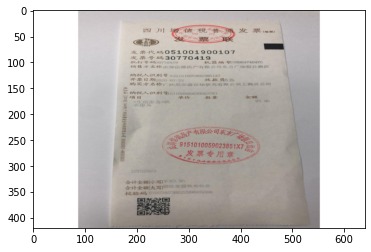

In [11]:
image = base64_decoding(res,resize_image = True)
plt.imshow(image)

In [12]:
output = base64_cv2_encoding(image_name,resize_image = True, width=640,height=420)

In [13]:
image = base64_cv2_decoding(output)

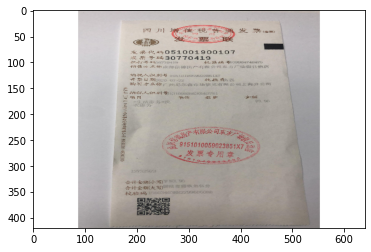

In [14]:
plt.imshow(image)

<h2> Speed Test </h2>

<h3>First approach</h3>

In [15]:
start_time = time.time()
res = base64_encoding(image_name)
image1 = base64_decoding(res,resize_image = True)
end_time = time.time()

In [16]:
first_approach = end_time-start_time
first_approach

0.29799723625183105

<h3>Second approach</h3>

In [17]:
start_time = time.time()
output = base64_cv2_encoding(image_name,resize_image = True, width=640,height=420)
image1 = base64_cv2_decoding(output)
end_time = time.time()

In [18]:
second_approach = end_time-start_time
second_approach

0.24100327491760254